In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

%matplotlib inline

In [4]:
import os
df = pd.read_csv(os.path.join("data", "db", "Observations.csv"))

## Cleaning and Feature Selection

In [5]:
df['Annual Salary'] = df['Annual Salary'].str.replace("$", "")
df['Annual Salary'] = df['Annual Salary'].str.replace(",", "")
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'])
df['Log Annual Salary'] = np.log(df['Annual Salary'])
#df.head()

# Average Player Salary by year
df_gb_year = df.groupby('Salary Year')
counts = df_gb_year.count()
average_player_salaries = df_gb_year.sum()['Annual Salary'] / df_gb_year.count()['Annual Salary']
avg_player_salaries_df = average_player_salaries.reset_index()
avg_player_salaries_df.columns = ['Salary Year', 'Average Annual Player Salary']
df = pd.merge(df, avg_player_salaries_df, on='Salary Year')

df['Scaled Salary'] = df['Annual Salary'] / df['Average Annual Player Salary']

# Pitching metrics
# Wins per Inning Pitched. This might be more useful than wins alone.
df['Pitching_Career_WPIP'] = df['Pitching_Career_W'] / df['Pitching_Career_IP'] 

# Starter or reliever? Games Started Per Full Games Played
df['Pitching_Career_GSPFGP']= df['Pitching_Career_GS'] * 9 / df['Pitching_Career_IP']   
df.head()



,Player Id,Salary Year,Annual Salary,Contract Years,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,Advanced Pitching_HR/9.Year-1,...,Player Id.1,Team 1.Year-1,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP
0,jbverlander,2015,25714285,7 (2013-19),0.320,2.84,14.0,9.0,9.74,0.79,...,jbverlander,DET,NaN,NaN,NaN,17.062557,4.611712e+06,5.575865,0.076900,1.356875
1,dzgreinke,2015,24500000,6 (2013-18),0.312,1.91,3.0,0.0,8.45,0.85,...,dzgreinke,LAD,NaN,NaN,NaN,17.014184,4.611712e+06,5.312561,0.066282,1.404899
2,jhhamilton,2015,25000000,5 (2013-17),NaN,NaN,NaN,NaN,NaN,NaN,...,jhhamilton,LAA,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,NaN,NaN
3,rjhoward,2015,25000000,5 (2012-16),NaN,NaN,NaN,NaN,NaN,NaN,...,rjhoward,PHI,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,NaN,NaN
4,fahernandez,2015,25000000,7 (2013-19),0.260,1.75,13.0,7.0,6.48,0.61,...,fahernandez,SEA,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,0.060736,1.325009


## Sanity check to make sure we have reasonable amount of data per year

Also, what does the growth in salaries over time look like?

In [6]:
salaries_by_year = df.groupby('Salary Year').sum().reset_index()
salaries_by_year

,Salary Year,Annual Salary,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,Advanced Pitching_HR/9.Year-1,Advanced Pitching_IR.Year-1,Advanced Pitching_IR_S.Year-1,...,Pitching_SO.Year-1,Pitching_SV.Year-1,Pitching_SVO.Year-1,Pitching_W.Year-1,Pitching_WHIP.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP
0,2013,2993361745,99.871,1056.50,4202.0,1281.0,2882.43,313.22,4165.0,1177.0,...,26655.0,1049.0,1453.0,1828.0,437.65,9860.947587,2.993362e+09,677.0,17.540455,253.089541
1,2014,3341187887,121.113,1401.54,4616.0,1415.0,3509.27,407.04,4650.0,1305.0,...,30128.0,1127.0,1583.0,2074.0,545.72,11504.999852,3.341188e+09,794.0,21.649976,304.425072
2,2015,3634029165,132.874,1343.88,4862.0,1456.0,3782.77,403.73,4702.0,1311.0,...,33114.0,1244.0,1713.0,2194.0,569.72,11487.181556,3.634029e+09,788.0,21.627907,323.809421


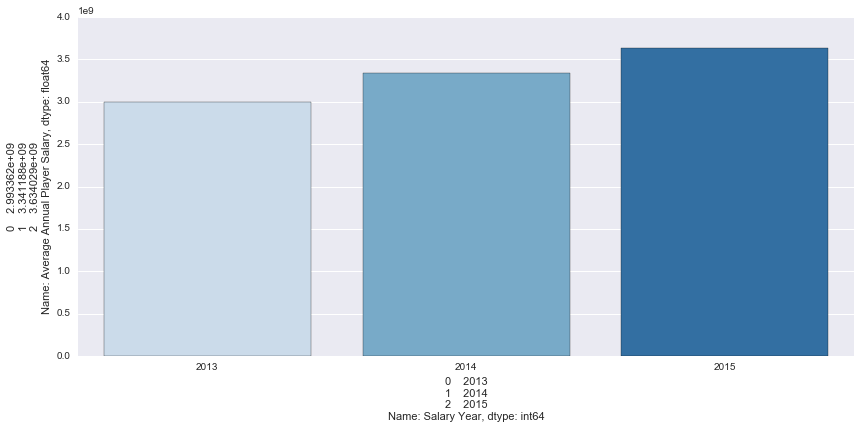

In [7]:
sns.factorplot(salaries_by_year['Salary Year'], salaries_by_year['Average Annual Player Salary'], data=df,kind="bar",palette="Blues",size=6,aspect=2,legend_out=False);


In [8]:
# Set position to prior year's
df['Position'] = df['Fielding_POS.1.Year-1']

# Add categorical value for multiple positions
df[df['Num Positions.Year-1'] > 1]['Position'] = 'MULTIPLE'
df.head()

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Player Id,Salary Year,Annual Salary,Contract Years,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,Advanced Pitching_HR/9.Year-1,...,Team 1.Year-1,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
0,jbverlander,2015,25714285,7 (2013-19),0.320,2.84,14.0,9.0,9.74,0.79,...,DET,NaN,NaN,NaN,17.062557,4.611712e+06,5.575865,0.076900,1.356875,P
1,dzgreinke,2015,24500000,6 (2013-18),0.312,1.91,3.0,0.0,8.45,0.85,...,LAD,NaN,NaN,NaN,17.014184,4.611712e+06,5.312561,0.066282,1.404899,P
2,jhhamilton,2015,25000000,5 (2013-17),NaN,NaN,NaN,NaN,NaN,NaN,...,LAA,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,NaN,NaN,LF
3,rjhoward,2015,25000000,5 (2012-16),NaN,NaN,NaN,NaN,NaN,NaN,...,PHI,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,NaN,NaN,1B
4,fahernandez,2015,25000000,7 (2013-19),0.260,1.75,13.0,7.0,6.48,0.61,...,SEA,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,0.060736,1.325009,P


In [9]:
df.loc[df['Num Positions.Year-1'] > 1, 'Position'] = 'MULTIPLE'
df

,Player Id,Salary Year,Annual Salary,Contract Years,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,Advanced Pitching_HR/9.Year-1,...,Team 1.Year-1,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
0,jbverlander,2015,25714285,7 (2013-19),0.320,2.84,14.0,9.0,9.74,0.79,...,DET,NaN,NaN,NaN,17.062557,4.611712e+06,5.575865,0.076900,1.356875,P
1,dzgreinke,2015,24500000,6 (2013-18),0.312,1.91,3.0,0.0,8.45,0.85,...,LAD,NaN,NaN,NaN,17.014184,4.611712e+06,5.312561,0.066282,1.404899,P
2,jhhamilton,2015,25000000,5 (2013-17),NaN,NaN,NaN,NaN,NaN,NaN,...,LAA,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,NaN,NaN,MULTIPLE
3,rjhoward,2015,25000000,5 (2012-16),NaN,NaN,NaN,NaN,NaN,NaN,...,PHI,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,NaN,NaN,1B
4,fahernandez,2015,25000000,7 (2013-19),0.260,1.75,13.0,7.0,6.48,0.61,...,SEA,NaN,NaN,NaN,17.034386,4.611712e+06,5.420980,0.060736,1.325009,P
5,japujols,2015,24000000,10 (2012-21),NaN,NaN,NaN,NaN,NaN,NaN,...,LAA,NaN,NaN,NaN,16.993564,4.611712e+06,5.204141,NaN,NaN,MULTIPLE
6,rjcano,2015,24000000,10 (2014-23),NaN,NaN,NaN,NaN,NaN,NaN,...,SEA,NaN,NaN,NaN,16.993564,4.611712e+06,5.204141,NaN,NaN,2B
7,cekershaw,2015,30714286,7 (2014-20),0.281,1.41,3.0,1.0,6.31,0.41,...,LAD,NaN,NaN,NaN,17.240238,4.611712e+06,6.660061,0.071185,1.366311,P
8,psfielder,2015,23777778,9 (2012-20),NaN,NaN,NaN,NaN,NaN,NaN,...,TEX,NaN,NaN,NaN,16.984262,4.611712e+06,5.155955,NaN,NaN,1B
9,cmhamels,2015,24000000,6 (2013-18),0.298,2.59,8.0,1.0,7.74,0.62,...,PHI,NaN,NaN,NaN,16.993564,4.611712e+06,5.204141,0.060033,1.370762,P


In [10]:
# Add Start, End, Remaining years
#contract_years_df = df['Contract Years'].str.extract('(?P<num_years>[0-9]+)(\s+\((?P<start_year>[0-9]+\s*)-\s*(?P<end_year>[0-9]+))*\)')
#df['Contract Num Years'] = contract_years_df['num_years']
#df['Contract Start Year']
#df['Contract Num Years'] = contract_years_df['num_years']
#df['Start Year'] = contract_years_df['start_year']
#df

## Top 10 Highest Paid Players

In [11]:
# Biggest Salaries
df = df.sort(columns=['Scaled Salary'], ascending=False)
top_ten = df[:10]
top_ten[['Player Id', 'Salary Year', 'Annual Salary', 'Scaled Salary', 'Batting_Career_Num_Seasons', 'Pitching_Career_Num_Seasons', 'Position']]

C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Player Id,Salary Year,Annual Salary,Scaled Salary,Batting_Career_Num_Seasons,Pitching_Career_Num_Seasons,Position
795,cekershaw,2014,30714286,7.298944,6,6,P
1614,cekershaw,2013,30714286,6.946562,5,5,P
799,jmcabrera,2014,29200000,6.939089,11,0,3B
7,cekershaw,2015,30714286,6.660061,7,7,P
1048,aerodriguez,2014,27500000,6.535101,20,0,3B
37,mmscherzer,2015,30000000,6.505176,7,7,P
13,jmcabrera,2015,29200000,6.331705,12,0,MULTIPLE
1582,aerodriguez,2013,27500000,6.219596,19,0,3B
806,jbverlander,2014,25714285,6.110744,8,9,P
14,aerodriguez,2015,27500000,5.963078,20,0,NaN


In [12]:
df[df['Player Id'] == 'magonzalez']

,Player Id,Salary Year,Annual Salary,Contract Years,Advanced Pitching_BABIP.Year-1,Advanced Pitching_BB/9.Year-1,Advanced Pitching_BQR.Year-1,Advanced Pitching_BQR_S.Year-1,Advanced Pitching_H/9.Year-1,Advanced Pitching_HR/9.Year-1,...,Team 1.Year-1,Team 2.Year-1,Team 3.Year-1,Team 4.Year-1,Log Annual Salary,Average Annual Player Salary,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_GSPFGP,Position
2142,magonzalez,2013,502000,1 (2013),0.261,2.99,12.0,2.0,7.86,1.11,...,BAL,NaN,NaN,NaN,13.126355,4.421509e+06,0.113536,0.085633,1.284491,P


In [13]:
# Subset columns
df = pd.DataFrame(df, columns=['Player Id', 'Salary Year', 'Annual Salary', 'Scaled Salary',
                               'Log Annual Salary', 'Contract Years', 'Position', 
                               'Batting_Career_Num_Seasons', 'Batting_Career_G', 'Batting_Career_AVG', 
                               'Batting_Career_PSN', 'Batting_Career_SB', 'Batting_Career_HR',
                               'Batting_Career_RBI', 
                               'Pitching_Career_Num_Seasons', 'Pitching_Career_G', 'Pitching_Career_ER',
                               'Pitching_Career_ERA', 'Pitching_Career_IP', 'Pitching_Career_SO',
                               'Pitching_Career_SHO', 'Pitching_Career_W', 'Pitching_Career_L',
                               'Pitching_Career_WPIP', 'Pitching_Career_GS', 'Pitching_Career_GSPFGP',
                               'Fielding_Career_Num_Seasons', 'Fielding_Career_G', 'Fielding_Career_FPCT', 
                               'Fielding_Career_A', 'Fielding_Career_PO', 'Fielding_Career_E'])
df.head()

,Player Id,Salary Year,Annual Salary,Scaled Salary,Log Annual Salary,Contract Years,Position,Batting_Career_Num_Seasons,Batting_Career_G,Batting_Career_AVG,...,Pitching_Career_L,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E
795,cekershaw,2014,30714286,7.298944,17.240238,7 (2014-20),P,6,181.0,0.153846,...,46.0,0.065332,182.0,1.389784,6,184.0,0.986111,174.0,39.0,3.0
1614,cekershaw,2013,30714286,6.946562,17.240238,7 (2014-20),P,5,146.0,0.145594,...,37.0,0.064715,149.0,1.422661,5,151.0,0.988950,147.0,32.0,2.0
799,jmcabrera,2014,29200000,6.939089,17.189679,10 (2014-23),3B,11,1660.0,0.320843,...,0.0,NaN,0.0,NaN,11,1979.0,0.981539,1525.0,6397.0,149.0
7,cekershaw,2015,30714286,6.660061,17.240238,7 (2014-20),P,7,207.0,0.157107,...,49.0,0.071185,209.0,1.366311,7,211.0,0.980545,205.0,47.0,5.0
1048,aerodriguez,2014,27500000,6.535101,17.129697,10 (2008-17),3B,20,2568.0,0.299348,...,0.0,NaN,0.0,NaN,20,2461.0,0.973057,5683.0,2768.0,234.0


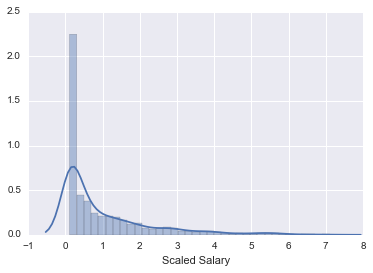

In [14]:
sns.distplot(df['Scaled Salary'])

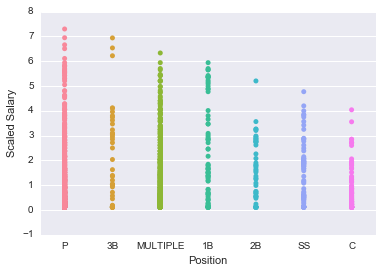

In [15]:
sns.stripplot(x="Position", y="Scaled Salary", data=df)


## Examine Pitchers



In [16]:
# Divide into quantiles
quantiles = pd.qcut(df['Scaled Salary'], 10, labels=['q' + str(x+1) for x in range(10)])
df['Salary Quantile'] = quantiles
df[df['Salary Quantile'] == 'q10']

,Player Id,Salary Year,Annual Salary,Scaled Salary,Log Annual Salary,Contract Years,Position,Batting_Career_Num_Seasons,Batting_Career_G,Batting_Career_AVG,...,Pitching_Career_WPIP,Pitching_Career_GS,Pitching_Career_GSPFGP,Fielding_Career_Num_Seasons,Fielding_Career_G,Fielding_Career_FPCT,Fielding_Career_A,Fielding_Career_PO,Fielding_Career_E,Salary Quantile
795,cekershaw,2014,30714286,7.298944,17.240238,7 (2014-20),P,6,181.0,0.153846,...,0.065332,182.0,1.389784,6,184.0,0.986111,174.0,39.0,3.0,q10
1614,cekershaw,2013,30714286,6.946562,17.240238,7 (2014-20),P,5,146.0,0.145594,...,0.064715,149.0,1.422661,5,151.0,0.988950,147.0,32.0,2.0,q10
799,jmcabrera,2014,29200000,6.939089,17.189679,10 (2014-23),3B,11,1660.0,0.320843,...,NaN,0.0,NaN,11,1979.0,0.981539,1525.0,6397.0,149.0,q10
7,cekershaw,2015,30714286,6.660061,17.240238,7 (2014-20),P,7,207.0,0.157107,...,0.071185,209.0,1.366311,7,211.0,0.980545,205.0,47.0,5.0,q10
1048,aerodriguez,2014,27500000,6.535101,17.129697,10 (2008-17),3B,20,2568.0,0.299348,...,NaN,0.0,NaN,20,2461.0,0.973057,5683.0,2768.0,234.0,q10
37,mmscherzer,2015,30000000,6.505176,17.216708,7 (2015-21),P,7,55.0,0.164557,...,0.073523,198.0,1.439767,7,207.0,0.946809,100.0,78.0,10.0,q10
13,jmcabrera,2015,29200000,6.331705,17.189679,10 (2014-23),MULTIPLE,12,1819.0,0.320105,...,NaN,0.0,NaN,12,2115.0,0.983101,1636.0,7381.0,155.0,q10
1582,aerodriguez,2013,27500000,6.219596,17.129697,10 (2008-17),3B,19,2524.0,0.300248,...,NaN,0.0,NaN,19,2434.0,0.972938,5631.0,2746.0,233.0,q10
806,jbverlander,2014,25714285,6.110744,17.062557,7 (2013-19),P,8,14.0,0.000000,...,0.077375,266.0,1.352084,9,266.0,0.935976,195.0,112.0,21.0,q10
14,aerodriguez,2015,27500000,5.963078,17.129697,10 (2008-17),NaN,20,2568.0,0.299348,...,NaN,0.0,NaN,20,2461.0,0.973057,5683.0,2768.0,234.0,q10


In [17]:
pitchers = df[df['Pitching_Career_G'] > 100]
# Divide into quantiles
quantiles = pd.qcut(df['Scaled Salary'], 10, labels=['q' + str(x+1) for x in range(10)])
df['Salary Quantile'] = quantiles
top_pitchers = pitchers[pitchers['Salary Quantile'] == 'q10']
top_pitchers = pd.DataFrame(top_pitchers, columns=['Player Id', 'Salary Year', 'Annual Salary', 'Scaled Salary', 'Pitching_Career_G', 'Pitching_Career_ERA', 'Pitching_Career_IP', 'Pitching_Career_WPIP'])
top_pitchers[:10]

,Player Id,Salary Year,Annual Salary,Scaled Salary,Pitching_Career_G,Pitching_Career_ERA,Pitching_Career_IP,Pitching_Career_WPIP
795,cekershaw,2014,30714286,7.298944,184.0,2.603937,1178.6,0.065332
1614,cekershaw,2013,30714286,6.946562,151.0,2.797581,942.6,0.064715
7,cekershaw,2015,30714286,6.660061,211.0,2.484201,1376.7,0.071185
37,mmscherzer,2015,30000000,6.505176,207.0,3.584875,1237.7,0.073523
806,jbverlander,2014,25714285,6.110744,266.0,3.410708,1770.6,0.077375
798,fahernandez,2014,25000000,5.941001,269.0,3.200702,1822.1,0.060370
788,dzgreinke,2014,24500000,5.822181,334.0,3.633704,1879.9,0.064365
1597,jbverlander,2013,25714285,5.815726,232.0,3.402899,1552.5,0.079871
797,ccsabathia,2014,24400000,5.798417,450.0,3.528245,3025.3,0.073381
792,cmhamels,2014,24000000,5.703361,245.0,3.380361,1594.8,0.062077


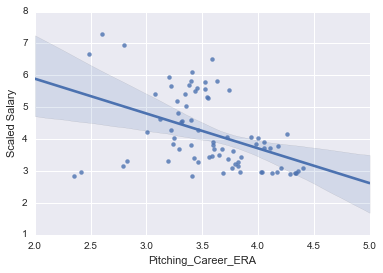

In [18]:
sns.regplot(x='Pitching_Career_ERA', y='Scaled Salary', scatter=True, data=top_pitchers)

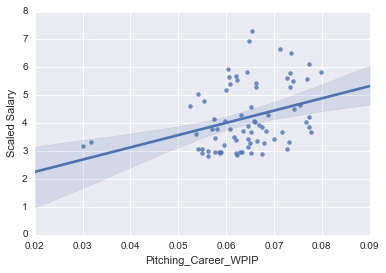

In [19]:
sns.regplot(x='Pitching_Career_WPIP', y='Scaled Salary', scatter=True, data=top_pitchers)

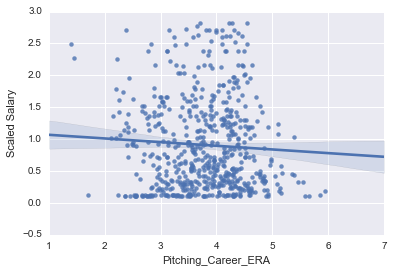

In [20]:
# All other pitchers?
sns.regplot(x='Pitching_Career_ERA', y='Scaled Salary', 
            scatter=True, 
            data=pitchers[pitchers['Salary Quantile'] != 'q10'])

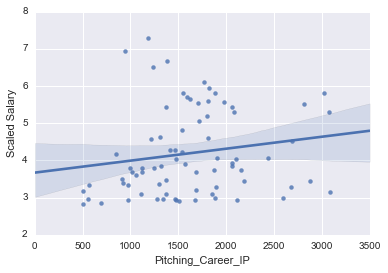

In [21]:
sns.regplot(x='Pitching_Career_IP', y='Scaled Salary', scatter=True, data=top_pitchers)

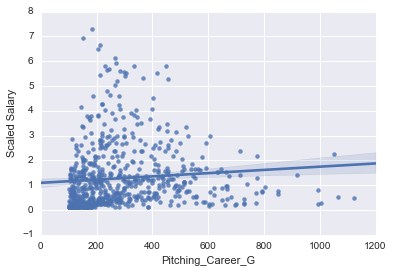

In [22]:
sns.regplot(x='Pitching_Career_G', y='Scaled Salary', scatter=True, data=pitchers)

In [23]:
pitching_df = pd.DataFrame(pitchers, columns=['Scaled Salary', 'Pitching_Career_WPIP', 'Pitching_Career_IP',
                                              'Pitching_Career_W', 'Pitching_Career_L', 'Pitching_Career_ERA', 'Pitching_Career_SO',
                                              'Pitching_Career_SHO', 'Pitching_Career_Num_Seasons', 'Pitching_Career_G',
                                              'Pitching_Career_GS', 'Pitching_Career_GSPFGP'
                                             ])
pitching_df.corr()
                           

,Scaled Salary,Pitching_Career_WPIP,Pitching_Career_IP,Pitching_Career_W,Pitching_Career_L,Pitching_Career_ERA,Pitching_Career_SO,Pitching_Career_SHO,Pitching_Career_Num_Seasons,Pitching_Career_G,Pitching_Career_GS,Pitching_Career_GSPFGP
Scaled Salary,1.000000,0.274629,0.632124,0.660579,0.530169,-0.136061,0.704830,0.631334,0.366136,0.087664,0.615734,0.453221
Pitching_Career_WPIP,0.274629,1.000000,0.203127,0.332234,0.137675,-0.218283,0.225839,0.244612,0.026195,-0.052457,0.224634,0.167266
Pitching_Career_IP,0.632124,0.203127,1.000000,0.979366,0.965877,0.224121,0.962433,0.831087,0.737865,0.289198,0.957925,0.649819
Pitching_Career_W,0.660579,0.332234,0.979366,1.000000,0.914804,0.154488,0.953066,0.855784,0.683897,0.242613,0.944938,0.628242
Pitching_Career_L,0.530169,0.137675,0.965877,0.914804,1.000000,0.337030,0.911408,0.748809,0.733119,0.286054,0.934929,0.676966
Pitching_Career_ERA,-0.136061,-0.218283,0.224121,0.154488,0.337030,1.000000,0.137548,0.086297,0.227575,-0.072019,0.286290,0.487330
Pitching_Career_SO,0.704830,0.225839,0.962433,0.953066,0.911408,0.137548,1.000000,0.809086,0.711991,0.304518,0.912975,0.607291
Pitching_Career_SHO,0.631334,0.244612,0.831087,0.855784,0.748809,0.086297,0.809086,1.000000,0.470582,0.032680,0.838537,0.554378
Pitching_Career_Num_Seasons,0.366136,0.026195,0.737865,0.683897,0.733119,0.227575,0.711991,0.470582,1.000000,0.750397,0.561386,0.264344
Pitching_Career_G,0.087664,-0.052457,0.289198,0.242613,0.286054,-0.072019,0.304518,0.032680,0.750397,1.000000,0.017041,-0.285261


Columns we could use for a model have a low correlation with each other and a high correlation with the variable we are predicting. Some candidates appear to be:

Pitching_Career_SO (or Pitching_Career_IP, Pitching_Career_GS)
Pitching_Career_ERA

We might want to look at quartiles and see if these relationships hold or are different. For example, ERA has a stronger effect for top pitchers than for all pitchers. 

What about fielding percentage and other fielding metrics? We'll look at that in the section below.

## Model just pitchers


In [29]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

X = np.asarray(pd.DataFrame(pitchers, columns=['Pitching_Career_SO', 'Pitching_Career_ERA']))
y = np.asarray(pitchers['Scaled Salary'])
regr = linear_model.LinearRegression()

# Simple train/test split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=55)
regr.fit(x_train, y_train)
score = regr.score(x_test, y_test)
print(score)

# K-fold group cross-validation
pitchers.sort(['Player Id'], inplace=True)
players = list(pitchers['Player Id'].values)

groups = [players.index(row['Player Id']) for index, row in pitchers.iterrows()]
score = cross_val_score(regr, X, y, groups, cv=GroupKFold(n_splits=5))



0.551124655421


C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Owner\Anaconda3\envs\data_analysis\lib\site-packages\pandas\core\frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


## Examine Batting

In [ ]:
sns.regplot(x='Batting_Career_AVG', y='Scaled Salary', scatter=True, data=df)

In [ ]:
sns.regplot(x='Batting_Career_G', y='Annual Salary', scatter=True, data=df)

In [ ]:
pitching_df = pd.DataFrame(df[df['Pitching_Career_G'] > 0])
sns.regplot(x='Pitching_Career_ERA', y='Annual Salary', scatter=True, data=df)

In [ ]:
pitching_df = pd.DataFrame(df[df['Pitching_Career_G'] > 0])
sns.regplot(x='Pitching_Career_G', y='Annual Salary', scatter=True, data=df)

In [ ]:
fielding_df = pd.DataFrame(df[df['Fielding_Career_G'] > 0])
sns.regplot(x='Fielding_Career_G', y='Annual Salary', scatter=True, data=df)

In [ ]:
sns.regplot(x='Fielding_Career_FPCT', y='Annual Salary', scatter=True, data=df)

In [ ]:
sns.regplot(x='Batting_Career_RBI', y='Annual Salary', scatter=True, data=df)
#batting_df['Batting_Career_RBI']

In [ ]:
sns.regplot(x='Pitching_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)

In [ ]:
sns.regplot(x='Batting_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)

In [ ]:
sns.regplot(x='Fielding_Career_Num_Seasons', y='Annual Salary', scatter=True, data=df)